# **Grupo 13: Parte 1 del entregable, ejercicios 2 y 3**

Comienza con las transformaciones que traemos del ejercicio previo.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas
import seaborn as sns

pd.set_option('display.max_columns', 500)
sns.set_context('talk')

In [2]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
melb_df.Price.quantile(.95).round()

#Se podría definir una regla objetiva para eliminar datos outliers como: 1.5 veces el RI por encima o por debajo de los cuartiles 1 y 3.

q25=melb_df.Price.quantile(.25)
q75=melb_df.Price.quantile(.75)

RI=q75-q25

lim_inferior=q25-1.5*RI
lim_superior=q75+1.5*RI

print("Nuevo mínimo=", lim_inferior)   #como el mínimo es negativo, tomaría el mínimo real de la variable. Es decir, solo restringiríamos la cola derecha de la distribución
print("Nuevo máximo=",lim_superior)

Nuevo mínimo= -370000.0
Nuevo máximo= 2350000.0


In [12]:
melb_df2=melb_df[melb_df.Price<lim_superior]

In [24]:
relevant_columns2=['Rooms', 'Type', 'Price', 'Method',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'SellerG','Suburb', 'CouncilArea']
melb_df3=melb_df2[relevant_columns2]

Agregar todas las otras modificaciones que hicimos a las variables, para partir desde ahí.

In [26]:
auction_price_groups = {
    'S': 'On price',
    'SA': 'On price',
    'PI': 'Under',
    'VB': 'Under',
    'SP': 'Above'
}

auction_price = melb_df3.Method.replace(auction_price_groups)

In [27]:
new_groups = {
    'Eastern Victoria': 'Victoria',
    'Northern Victoria': 'Victoria',
    'Western Victoria': 'Victoria',
    'Southern Metropolitan': 'Southern Metropolitan',
    'Northern Metropolitan': 'Northern Metropolitan',
    'Western Metropolitan': 'Western Metropolitan',
    'Eastern Metropolitan': 'South-Eastern Metropolitan',
    'South-Eastern Metropolitan': 'South-Eastern Metropolitan',
}

grouped_region = melb_df3.Regionname.replace(new_groups)

In [29]:
#Transformar la variable Date en una variable temporal

melb_df3['Date'] = pandas.to_datetime(melb_df3.Date, dayfirst=True)

<ipython-input-29-d07dc58a2532>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df3['Date'] = pandas.to_datetime(melb_df3.Date, dayfirst=True)


In [30]:
#Dado que la precisión por día no será útil, extraer por mes y año 

melb_df3['date_month'] = melb_df3.Date.dt.month
melb_df3['date_year'] = melb_df3.Date.dt.year

<ipython-input-30-66e7499d1105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df3['date_month'] = melb_df3.Date.dt.month


##### Año de construcción

In [32]:
melb_df3.head(2)

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year
0,2,h,1480000.0,S,2016-12-03,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,12,2016
1,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,2,2016


Text(0.5, 1.0, 'Variable año de construcción')

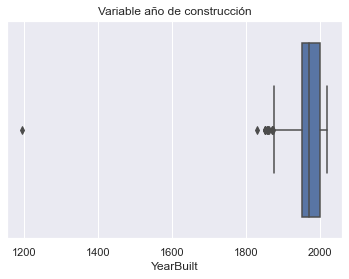

In [33]:
sns.set()
sns.boxplot(data=melb_df3,x='YearBuilt')

plt.title("Variable año de construcción")

In [34]:
melb_df3.YearBuilt.describe().reset_index()

,index,YearBuilt
0,count,7798.000000
1,mean,1965.767120
2,std,36.555041
3,min,1196.000000
4,25%,1950.000000
5,50%,1970.000000
6,75%,2000.000000
7,max,2018.000000


In [36]:
melb_df3=melb_df3[melb_df3.YearBuilt!=1196]


In [37]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [39]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': ['mean', 'count'],
        'monthly_price': ['mean', 'count']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'weekly_price count': 'airbnb_weekly_price_count',
             'monthly_price mean': 'airbnb_monthly_price_mean',
             'monthly_price count': 'airbnb_monthly_price_count'}
)

In [41]:
complete_df= melb_df3.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
complete_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12955 entries, 0 to 12954
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Rooms                       12955 non-null  int64         
 1   Type                        12955 non-null  object        
 2   Price                       12955 non-null  float64       
 3   Method                      12955 non-null  object        
 4   Date                        12955 non-null  datetime64[ns]
 5   Distance                    12955 non-null  float64       
 6   Postcode                    12955 non-null  float64       
 7   Bathroom                    12955 non-null  float64       
 8   Car                         12896 non-null  float64       
 9   Landsize                    12955 non-null  float64       
 10  BuildingArea                6765 non-null   float64       
 11  YearBuilt                   7797 non-null   float64   

In [42]:
#Deberíamos retomar la aliminación según conteo de casos por zipcode verdad?
complete_df2=complete_df[complete_df.airbnb_record_count>10]

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).


In [43]:
print("NaN de Suburbio=", complete_df2.Suburb.isna().sum())
print("NaN de CouncilArea=", complete_df2.CouncilArea.isna().sum())

NaN de Suburbio= 0
NaN de CouncilArea= 1193


In [44]:
complete_df2.Suburb.describe()    #259 categorías para Suburb

count         12357
unique          265
top       Reservoir
freq            359
Name: Suburb, dtype: object

In [45]:
complete_df2.CouncilArea.describe()    #30 categorías para CouncilArea, con lo cual un CouncilArea abarca a más de un Suburbio

count        11164
unique          31
top       Moreland
freq          1064
Name: CouncilArea, dtype: object

Métodos de imputación para variables string: El más frecuente (pero en este caso no serviría por el tipo de datos), Datawig Imputation Using Deep Learning (habría que comprender bien qué hace), sino la otra alternativa más manual que no se cómo programar acá.

La alternativa manual sería hacer un cuadro anidado y ver si los NaN se CouncilArea se encuentran Suburbs que ya tenían asociada en otra línea el CouncilArea. Sería fácil identificarlos en ese caso.

In [46]:
complete_df2.head(2)

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,2,h,1480000.0,S,2016-12-03,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,12,2016,3067.0,130.624031,258.0,605.152174,46.0,2187.032258,31.0
1,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,2,2016,3067.0,130.624031,258.0,605.152174,46.0,2187.032258,31.0


In [47]:
contador=0

for i in complete_df2[complete_df2.CouncilArea.isnull()].Suburb.unique():
    council_area=complete_df2[(complete_df2.Suburb==i) & (~complete_df2.CouncilArea.isnull())].CouncilArea.unique()
    if council_area.size!=0:
        if council_area.size>1:
            contador=contador+1
            print(i," CouncilArea", council_area)
            council_area=council_area[0]
            print("----------------Nos quedamos con el primero----------")
            print(i," CouncilArea:", council_area)
        else:
            council_area=council_area[0]
            print(i," CouncilArea:", council_area)
        
        complete_df2.loc[complete_df2[(complete_df2.Suburb==i) & (complete_df2.CouncilArea.isnull())].index,'CouncilArea']=council_area
        
print("Existen {} suburbs que pertenecen a mas de un CouncilArea".format(contador))

Brighton East  CouncilArea ['Bayside' 'Glen Eira']
----------------Nos quedamos con el primero----------
Brighton East  CouncilArea: Bayside
Reservoir  CouncilArea: Darebin
Aberfeldie  CouncilArea: Moonee Valley
Albion  CouncilArea: Brimbank
Alphington  CouncilArea ['Darebin' 'Yarra']
----------------Nos quedamos con el primero----------
Alphington  CouncilArea: Darebin
Altona  CouncilArea: Hobsons Bay
Altona Meadows  CouncilArea: Hobsons Bay
Altona North  CouncilArea: Hobsons Bay
Armadale  CouncilArea: Stonnington
Ascot Vale  CouncilArea: Moonee Valley
Balaclava  CouncilArea: Port Phillip
Balwyn North  CouncilArea: Boroondara
Bayswater  CouncilArea: Knox
Bentleigh East  CouncilArea: Glen Eira
Berwick  CouncilArea: Casey
Black Rock  CouncilArea: Bayside
Blackburn North  CouncilArea: Whitehorse
Box Hill  CouncilArea: Whitehorse
Briar Hill  CouncilArea: Banyule


C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Broadmeadows  CouncilArea: Hume
Brunswick  CouncilArea: Moreland
Brunswick East  CouncilArea: Moreland
Bundoora  CouncilArea ['Banyule' 'Whittlesea' 'Darebin']
----------------Nos quedamos con el primero----------
Bundoora  CouncilArea: Banyule
Burwood East  CouncilArea: Whitehorse
Camberwell  CouncilArea: Boroondara
Carlton North  CouncilArea: Yarra
Caulfield East  CouncilArea: Glen Eira
Cheltenham  CouncilArea ['Kingston' 'Bayside']
----------------Nos quedamos con el primero----------
Cheltenham  CouncilArea: Kingston
Clayton South  CouncilArea: Kingston
Clifton Hill  CouncilArea: Yarra
Coburg  CouncilArea: Moreland
Coburg North  CouncilArea ['Moreland' 'Darebin']
----------------Nos quedamos con el primero----------
Coburg North  CouncilArea: Moreland
Craigieburn  CouncilArea: Hume
Croydon  CouncilArea: Maroondah
Croydon Hills  CouncilArea: Maroondah
Croydon North  CouncilArea: Maroondah
Dallas  CouncilArea: Hume
Dandenong  CouncilArea: Greater Dandenong
Dandenong North  CouncilAre

In [48]:
complete_df2[(complete_df2.CouncilArea.isnull())]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
11704,3,h,657500.0,SP,2017-09-03,14.8,3023.0,2.0,2.0,631.0,NaN,NaN,-37.75225,144.75520,Western Metropolitan,1607.0,Harcourts,Burnside,NaN,9,2017,3023.0,92.600000,35.0,500.0,1.0,NaN,0.0
11885,3,h,640000.0,SP,2017-09-09,16.5,3049.0,2.0,2.0,607.0,NaN,NaN,-37.67379,144.89826,Northern Metropolitan,1130.0,YPA,Attwood,NaN,9,2017,3049.0,92.285714,21.0,400.0,1.0,NaN,0.0
12768,3,h,580000.0,S,2017-08-26,14.8,3023.0,2.0,2.0,461.0,174.0,2000.0,-37.74518,144.74708,Western Metropolitan,1607.0,YPA,Burnside,NaN,8,2017,3023.0,92.600000,35.0,500.0,1.0,NaN,0.0



### Quitamos CouncilArea

In [49]:
complete_df2.drop(['CouncilArea'],axis=1,inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Agregar texto explicando lo que se hizo para imputar, y decidimos igual que la variable CouncilArea no es una buena variable.**

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


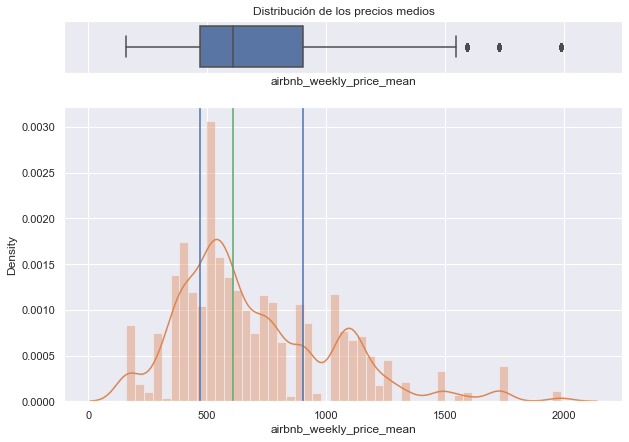

In [50]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df2.airbnb_weekly_price_mean, ax=ax_box)
sns.distplot(complete_df2.airbnb_weekly_price_mean, ax=ax_hist, kde=False, hist=False)
sns.distplot(complete_df2.airbnb_weekly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.25))
plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los precios medios")
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


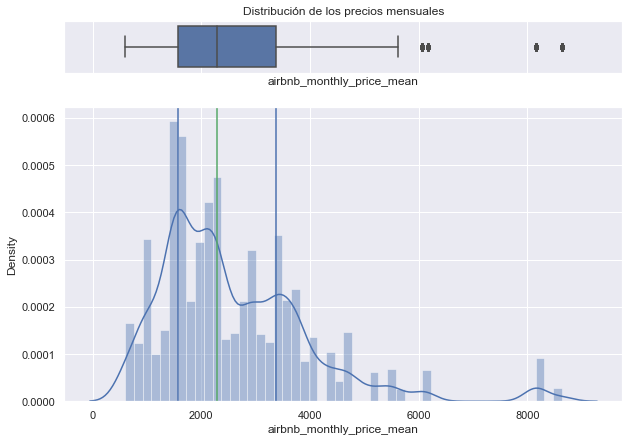

In [51]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df2.airbnb_monthly_price_mean, ax=ax_box)
sns.distplot(complete_df2.airbnb_monthly_price_mean, ax=ax_hist, kde=False, hist=False,color='b')
sns.distplot(complete_df2.airbnb_monthly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.25))
plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los precios mensuales")
plt.show()

<AxesSubplot:>

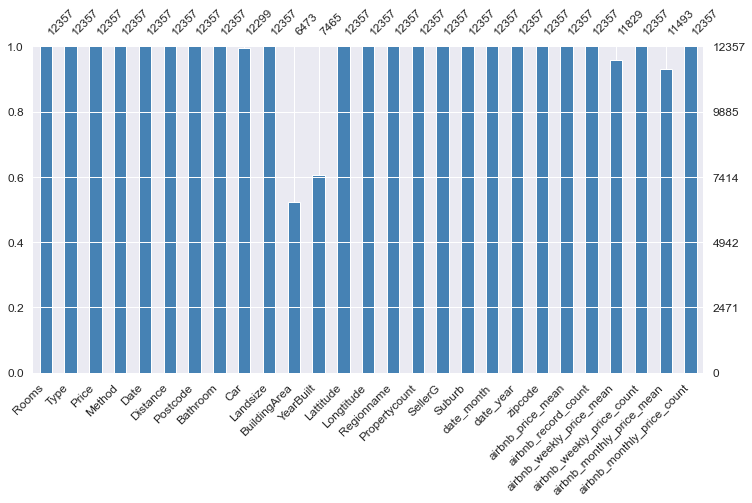

In [52]:
import missingno as msno
msno.bar(complete_df2,figsize=(12, 6), fontsize=12, color='steelblue')   
# el precio promedio tiene 20 datos faltantes si consideramos aquellos que tienen menos de 10 observaciones en el conteo, 
# sino se pueden hacer imputaciones sobre las otras varaibles

<AxesSubplot:>

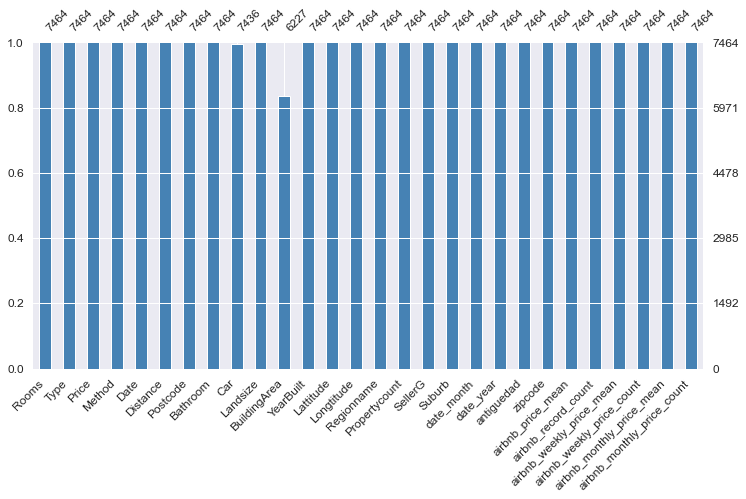

In [33]:
#1) Imputación por la media
from sklearn.impute import SimpleImputer
complete_df_mean = complete_df2.copy()

#setting strategy to 'mean' 
mean_imputer = SimpleImputer(missing_values=np.nan,strategy='mean') # strategy can also be mean or median or mean

complete_df_mean[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = mean_imputer.fit_transform(complete_df_mean[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_mean,figsize=(12, 6), fontsize=12, color='steelblue')

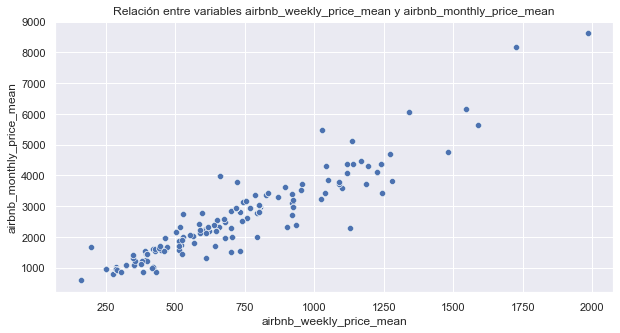

<AxesSubplot:>

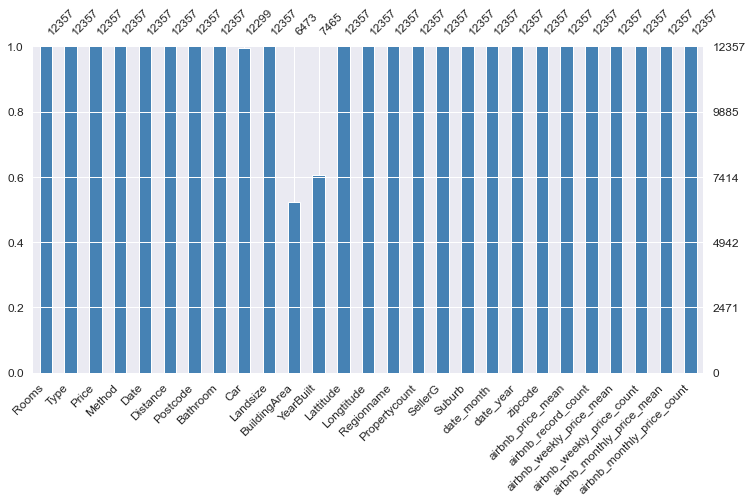

In [53]:
#2) KNN 

plt.figure(figsize=(10,5))
sns.scatterplot(x=complete_df2.airbnb_weekly_price_mean,y=complete_df2.airbnb_monthly_price_mean)
plt.title("Relación entre variables airbnb_weekly_price_mean y airbnb_monthly_price_mean")
plt.show()

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
complete_df_knn = complete_df2.copy(deep=True)

complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]]=scaler.fit_transform(complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = knn_imputer.fit_transform(complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_knn,figsize=(12, 6), fontsize=12, color='steelblue')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


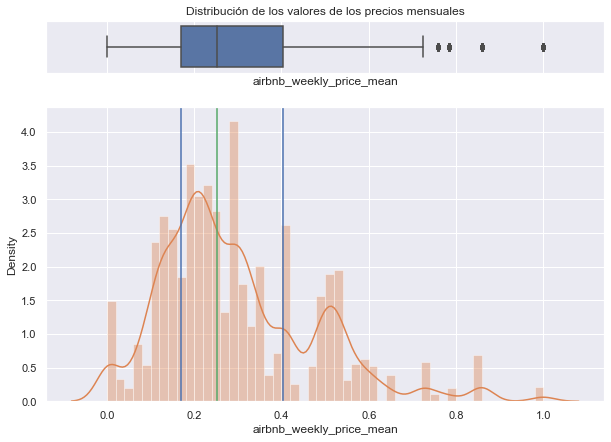

In [54]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_box)
sns.distplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_hist, kde=False, hist=False)
sns.distplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.25))
plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los valores de los precios mensuales")
plt.show()

<AxesSubplot:>

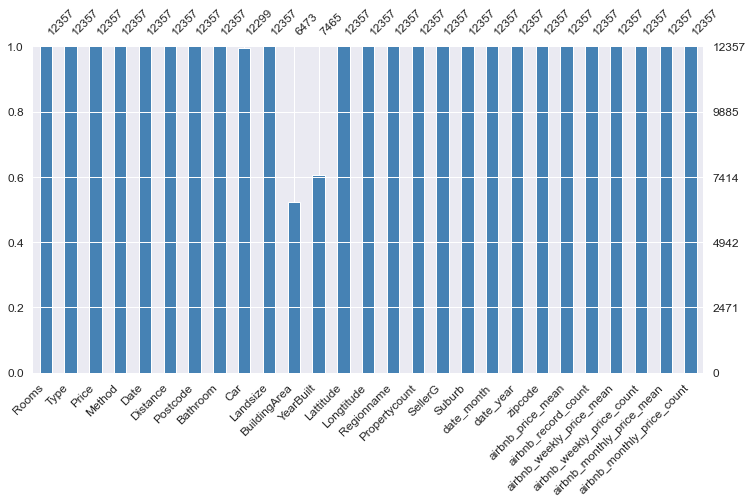

In [55]:
#3) Multivariate Feature Imputation   
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

complete_df_mice = complete_df2.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())

complete_df_mice[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = mice_imputer.fit_transform(complete_df_mice[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_mice,figsize=(12, 6), fontsize=12, color='steelblue')


La evaluación del mejor método de imputación se haría con el posterior análisis de las métricas elegidas del modelo de análisis supervisado. No existe una metodología de imputación ideal, sino que hay que hace run estudio para ver cual es la que mejor se ajusta al conjunto de datos utilizado.
En este caso, utilizamos el metodo Knn Imputer. Fue necesario un escalamiento de los datos porque se utiliza la distancia euclídea entre las observaciones para predecir el valor faltante. Se eligió el método MinMaxScaler (escalamiento entre 0 y 1) que es el más adecuado para este tipo de imputación.

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [56]:
#Elegir el data set con las mejores reglas de imputación para todas las variables y renombrarlo: df_final
df_final=complete_df_knn

df_final.to_csv("melbourne_houses_final_df.csv", index=False)

In [38]:
# from google.colab import files
# files.download("melbourne_houses_final_df.csv")